# Finding optimal hyper parameters for a CNN model

The point of this notebook is to obtain an optimal set of parameters for our CNN model to process time based series data. Specifically, we are processing IoT data from TON a well-kept dataset from The UNSW Group in Canberra, Australia.

The specific dataset being discussed here is the IoT Garage Door dataset.



We have pip install mealpy each time because it is not a default python package ,and every time the runtime refreshes; the package is uninstalled.

In [ ]:
%pip install mealpy==3.0.1
%pip install -U scikit-learn
%pip install imbalanced-learn
%pip install matplotlib
%pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.3/386.3 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 13.8 MB/s eta 0:00:00


Our main libraries used are:

*   Imblearn
*   Pandas
*   Matplot Lib
*   MealPy
*   Numpy
*   SKLearn
*   Tensorflow
*   Time



In [ ]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from imblearn.combine import SMOTETomek
import numpy
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
from mealpy import FloatVar, FOX
import time

# Preparing the Datasets for the CNN Model

We split off the information that indicates whether or not an attack has occured (*label*) and the types of attacks (*type*).
Now there are three dataframes:
  X - all features
  y - attack or not
  y_type - type of attack

We split again into test and train data sets and include some randomness.
**Reset_index** drops the indexes from these new dataframes.
Next, we encode the text data, add another randomness, and scale all dataframes. The X dataframe is reshaped.

In [ ]:
#Uncomment for local use
#raw_data = pandas.read_csv('../../Train_Test_IoT_dataset/Train_Test_IoT_Garage_Door.csv')
#Uncomment for Google Colab
raw_data = pandas.read_csv('Train_Test_IoT_Garage_Door.csv')
X = raw_data.drop(columns=['label','type'])
y = raw_data['label']
y_type = raw_data['type']

In [ ]:
# Binary
X_train, X_testsplit, y_train, y_testsplit = train_test_split(X, y, test_size=0.2, random_state=777)
# Binary validation
X_test, X_validation, y_test, y_validation = train_test_split(X_testsplit, y_testsplit, test_size=0.5, random_state=777)

#drop index
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
X_validation = X_validation.reset_index(drop=True)
y_validation = y_validation.reset_index(drop=True)

In [ ]:
encoder = OrdinalEncoder()
label_encoder = LabelEncoder()
X_train_encode = encoder.fit_transform(X_train)
X_test_encode = encoder.fit_transform(X_test)
y_train_encode = label_encoder.fit_transform(y_train)
y_test_encode = label_encoder.fit_transform(y_test)
X_validation_encode = encoder.fit_transform(X_validation)
y_validation_encode = label_encoder.fit_transform(y_validation)

In [ ]:
smotetomek = SMOTETomek(random_state=777)
X_rebalance, y_rebalance = smotetomek.fit_resample(X_train_encode, y_train_encode)

In [ ]:
scaler = StandardScaler()
X_rebalance = scaler.fit_transform(X_rebalance)
X_test_encode = scaler.transform(X_test_encode)

X_validation_encode = scaler.transform(X_validation_encode)

In [ ]:
X_rebalance = X_rebalance.reshape(X_rebalance.shape[0], X_rebalance.shape[1], 1)
X_test_encode = X_test_encode.reshape(X_test_encode.shape[0], X_test_encode.shape[1], 1)

X_validation_encode = X_validation_encode.reshape(X_validation_encode.shape[0], X_validation_encode.shape[1], 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 2, 50)          │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1, 50)          │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,633 (248.57 KB)

 Trainable params: 63,533 (248.18 KB)

 Non-trainable params: 100 (400.00 B)

Epoch 1/70
617/617 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.5236 - loss: 0.6916 - val_accuracy: 0.5552 - val_loss: 0.6908
Epoch 2/70
617/617 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.5330 - loss: 0.6908 - val_accuracy: 0.4893 - val_loss: 0.6901
Epoch 3/70
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5449 - loss: 0.6899 - val_accuracy: 0.4804 - val_loss: 0.6893
Epoch 4/70
617/617 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5497 - loss: 0.6890 - val_accuracy: 0.4052 - val_loss: 0.6887
Epoch 5/70
617/617 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5576 - loss: 0.6885 - val_accuracy: 0.4630 - val_loss: 0.6875
Epoch 6/70
617/617 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5602 - loss: 0.6878 - val_accuracy: 0.4458 - val_loss: 0.6868
Epoch 7/70
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5707 - loss: 0.6868 - val_accuracy: 0.4264 - val_loss: 0.6860
Epoch 8/70
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5780 - loss: 0.6857 - val_accuracy:

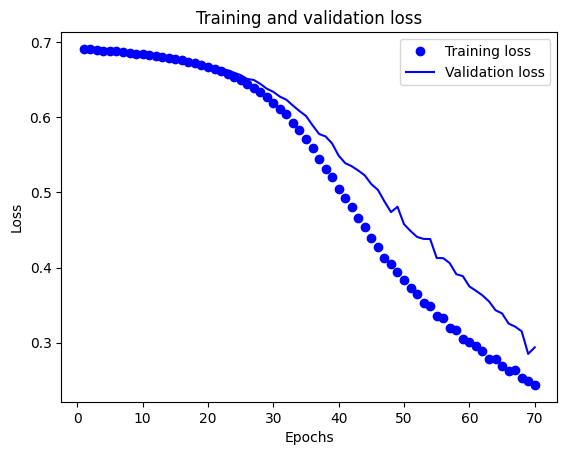

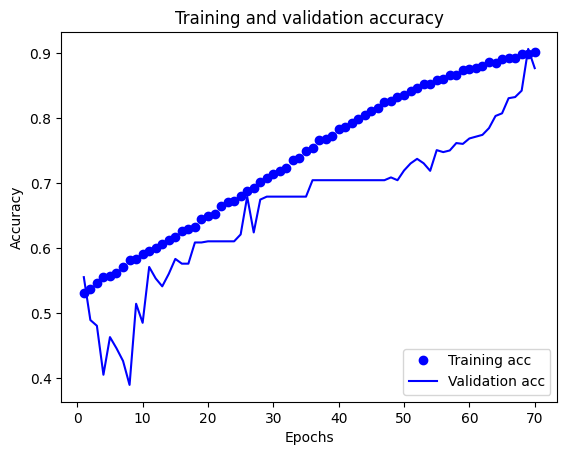


Classification Report
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1527
           1       1.00      0.77      0.87      2432

    accuracy                           0.86      3959
   macro avg       0.87      0.89      0.86      3959
weighted avg       0.90      0.86      0.86      3959


Confusion Matrix
[[1527    0]
 [ 551 1881]]


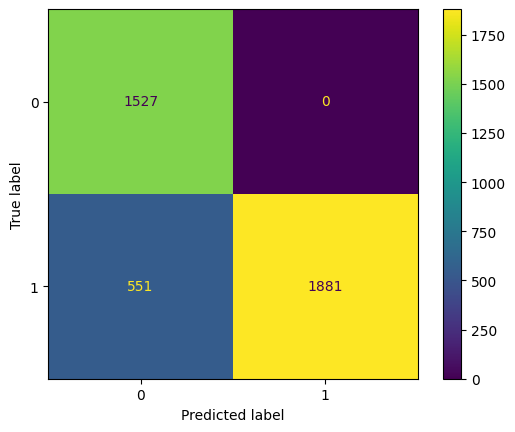

Time taken: 392.4963 seconds


In [ ]:
start_time_1 = time.perf_counter()
with tensorflow.device('/device:GPU:0'):
  # CNN model detection
  # https://keras.io/api/layers/activations/#softmax-function
  detection_model = tensorflow.keras.Sequential([
      tensorflow.keras.layers.Input(shape=(X_rebalance.shape[1],X_rebalance.shape[2])),
      tensorflow.keras.layers.Conv1D(filters=50, kernel_size=3, activation='sigmoid'),
      tensorflow.keras.layers.MaxPooling1D(pool_size=2),
      tensorflow.keras.layers.Dropout(0.3),
      tensorflow.keras.layers.BatchNormalization(),
      tensorflow.keras.layers.LSTM(64),
      tensorflow.keras.layers.Flatten(),
      # 1 layer
      tensorflow.keras.layers.Dense(512, activation='relu'),
      tensorflow.keras.layers.Dropout(0.5),
      # either attack or normal
      tensorflow.keras.layers.Dense(1, activation='sigmoid')
  ])

  detection_model.summary()
  # https://keras.io/api/losses/probabilistic_losses/#probabilistic-losses
  sgd = tensorflow.keras.optimizers.SGD(learning_rate=0.001)
  detection_model.compile(optimizer=sgd,
                loss=tensorflow.keras.losses.BinaryCrossentropy(from_logits=False),
                metrics=['accuracy'])

  history = detection_model.fit(X_rebalance, y_rebalance, batch_size=64, epochs=70, validation_data=(X_validation_encode, y_validation_encode))
  test_loss, test_acc = detection_model.evaluate(X_test_encode, y_test_encode)

  # Make predictions
  prediction = detection_model.predict(X_test_encode)
  print(prediction)
  attack_prediction = numpy.where(prediction > 0.5, 1, 0)
  print(attack_prediction)
  print(y_test)

  # Evaluate the model
  print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}\n")
  # https://www.tensorflow.org/tutorials/keras/text_classification for training and validation loss and accuracy
  history_dict = history.history
  # print(history_dict.keys())
  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = range(1, len(acc) + 1)

  # "bo" is for "blue dot"
  plt.plot(epochs, loss, 'bo', label='Training loss')
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  print("\n")

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.show()

  print("\nClassification Report")
  print(classification_report(y_test, attack_prediction))

  print("\nConfusion Matrix")
  print(confusion_matrix(y_test, attack_prediction))
  ConfusionMatrixDisplay.from_predictions(y_test, attack_prediction)
  plt.show()

end_time1 = time.perf_counter()
print(f"Time taken: {end_time1 - start_time_1:0.4f} seconds")

# Optimizing the model
Instead of looking at random number ranges for learning rates, filters, and hidden units, we have encoded specific values.

The hyper parameters we are attempting to optimize are:

*   Batch Size
*   Activation Functions
*   Learning Rates
*   Filters
*   Hidden Units


The base CNN model we made is ingested into *objective_function*.
  This is where our hyper parameters are being considered.
  It returns the Accuracy of that particular iteration.
**LB** and **UB** is set according to the list given above.



2025/04/15 08:31:43 PM, INFO, mealpy.swarm_based.FOX.OriginalFOX: Solving single objective optimization problem.


Accuracy 0.30260169506073
Accuracy 0.6150543093681335
Accuracy 0.29578179121017456
Accuracy 0.02652186155319214
Accuracy 0.2664814591407776
Accuracy 0.27633237838745117
Accuracy 0.19045215845108032
Accuracy 0.0
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.2818893790245056
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.23162412643432617
Accuracy 0.6150543093681335
Accuracy 0.38494569063186646
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.5420560836791992
Accuracy 0.6150543093681335
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.38494569063186646
Accuracy 0.38494569063186646
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.0
Accuracy 0.6006567180156708
Accuracy 0.0
Accuracy 0.0


2025/04/15 09:03:36 PM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 1, Current best: 0.0, Global best: 0.0, Runtime: 1032.60718 seconds


Accuracy 0.38494569063186646
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.38494569063186646
Accuracy 0.38494569063186646
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.38494569063186646
Accuracy 0.6150543093681335
Accuracy 0.38494569063186646
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0


2025/04/15 09:21:07 PM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 2, Current best: 0.0, Global best: 0.0, Runtime: 1051.51770 seconds


Accuracy 0.38494569063186646
Accuracy 0.38494569063186646
Accuracy 0.6150543093681335
Accuracy 0.6150543093681335
Accuracy 0.38494569063186646
Accuracy 0.29578179121017456
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.6203586757183075
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.38494569063186646
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.38494569063186646
Accuracy 0.38494569063186646
Accuracy 0.0


2025/04/15 09:39:02 PM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 3, Current best: 0.0, Global best: 0.0, Runtime: 1074.80141 seconds


Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.6150543093681335
Accuracy 0.6150543093681335
Accuracy 0.38494569063186646
Accuracy 0.6150543093681335
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.38494569063186646
Accuracy 0.38494569063186646
Accuracy 0.38494569063186646


2025/04/15 09:58:04 PM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 4, Current best: 0.0, Global best: 0.0, Runtime: 1142.20545 seconds


Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.6150543093681335
Accuracy 0.6150543093681335
Accuracy 0.38494569063186646
Accuracy 0.19752460718154907
Accuracy 0.3248295187950134
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0


2025/04/15 10:13:31 PM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 5, Current best: 0.0, Global best: 0.0, Runtime: 927.15889 seconds


Accuracy 0.6150543093681335
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.057842910289764404
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.38494569063186646


2025/04/15 10:28:19 PM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 6, Current best: 0.0, Global best: 0.0, Runtime: 888.18306 seconds


Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.6150543093681335
Accuracy 0.44430410861968994
Accuracy 0.6150543093681335
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.38494569063186646
Accuracy 0.4928011894226074
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.0


2025/04/15 10:44:44 PM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 7, Current best: 0.0, Global best: 0.0, Runtime: 984.86074 seconds


Accuracy 0.6150543093681335
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.6150543093681335


2025/04/15 11:00:01 PM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 8, Current best: 0.0, Global best: 0.0, Runtime: 916.37087 seconds


Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.38494569063186646
Accuracy 0.14852237701416016
Accuracy 0.5420560836791992
Accuracy 0.0
Accuracy 0.0
Accuracy 0.024501144886016846
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.38494569063186646
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.38494569063186646
Accuracy 0.6150543093681335


2025/04/15 11:16:22 PM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 9, Current best: 0.0, Global best: 0.0, Runtime: 981.48931 seconds


Accuracy 0.38494569063186646
Accuracy 0.6150543093681335
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.6150543093681335
Accuracy 0.38494569063186646
Accuracy 0.19045215845108032
Accuracy 0.2553675174713135
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.0


2025/04/15 11:33:51 PM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 10, Current best: 0.0, Global best: 0.0, Runtime: 1048.40189 seconds


Accuracy 0.6150543093681335
Accuracy 0.38494569063186646
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.38494569063186646
Accuracy 0.3604445457458496
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.38494569063186646
Accuracy 0.057842910289764404
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.6150543093681335
Accuracy 0.6150543093681335
Accuracy 0.38494569063186646
Accuracy 0.0


2025/04/15 11:51:31 PM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 11, Current best: 0.0, Global best: 0.0, Runtime: 1060.76781 seconds


Accuracy 0.0
Accuracy 0.18691587448120117
Accuracy 0.5420560836791992
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.6150543093681335
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.5428138375282288
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.38494569063186646
Accuracy 0.0


2025/04/16 12:08:02 AM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 12, Current best: 0.0, Global best: 0.0, Runtime: 990.86183 seconds


Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.14852237701416016
Accuracy 0.38494569063186646
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.6150543093681335
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.38494569063186646
Accuracy 0.0


2025/04/16 12:24:52 AM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 13, Current best: 0.0, Global best: 0.0, Runtime: 1009.89891 seconds


Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.6150543093681335
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.38494569063186646
Accuracy 0.0
Accuracy 0.6150543093681335


2025/04/16 12:42:18 AM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 14, Current best: 0.0, Global best: 0.0, Runtime: 1046.31730 seconds


Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.0
Accuracy 0.6150543093681335
Accuracy 0.6150543093681335
Accuracy 0.0
Accuracy 0.38494569063186646
Accuracy 0.38494569063186646
Accuracy 0.0


2025/04/16 12:57:55 AM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 15, Current best: 0.0, Global best: 0.0, Runtime: 936.53678 seconds


Accuracy 0.6150543093681335
Solution: [1.93953005 0.24121147 5.41064474 2.19970513 1.24955227], Fitness: 0.0
Solution: [1.93953005 0.24121147 5.41064474 2.19970513 1.24955227], Fitness: 0.0


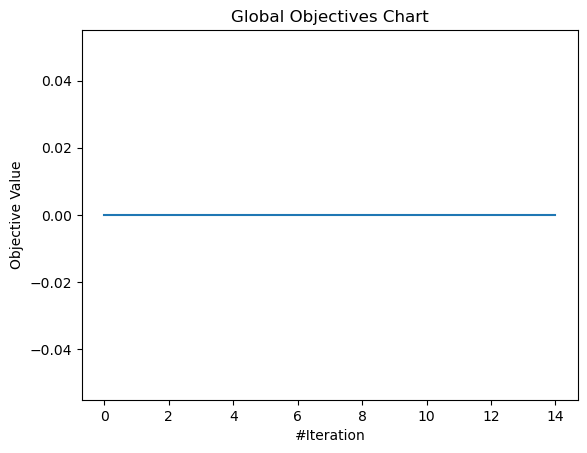

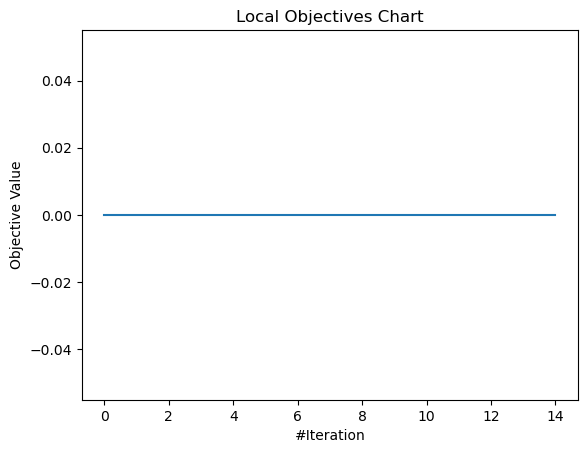

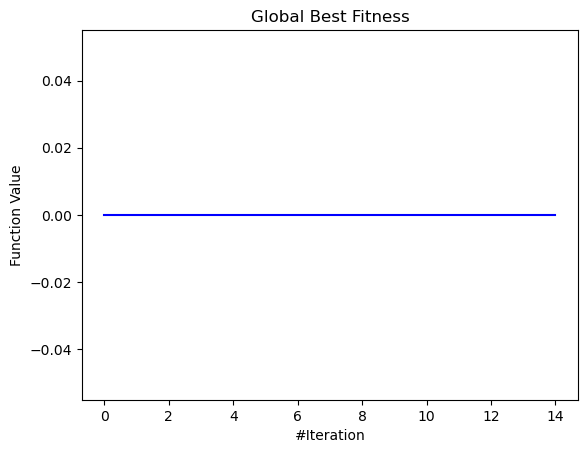

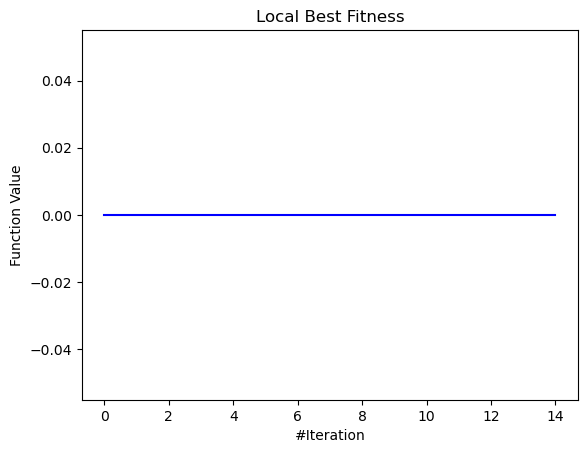

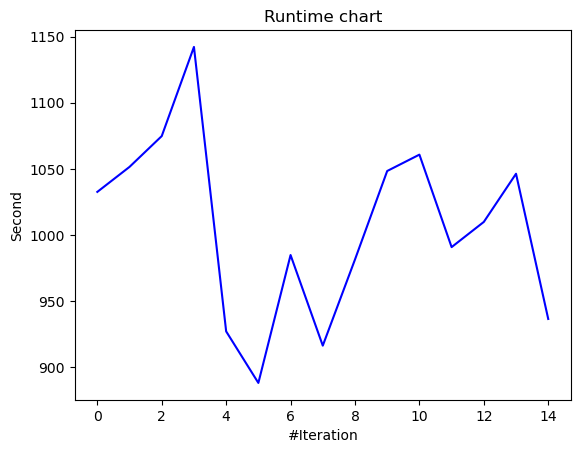

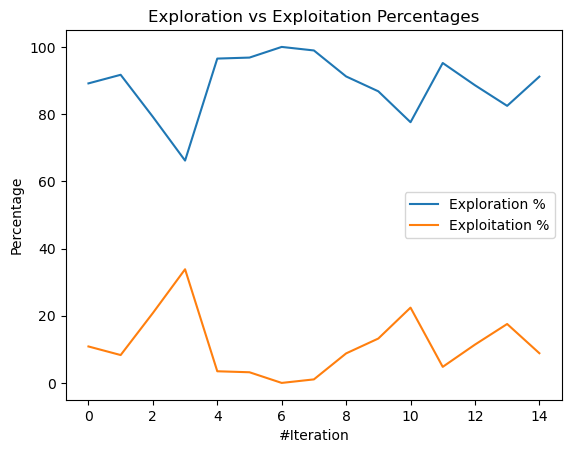

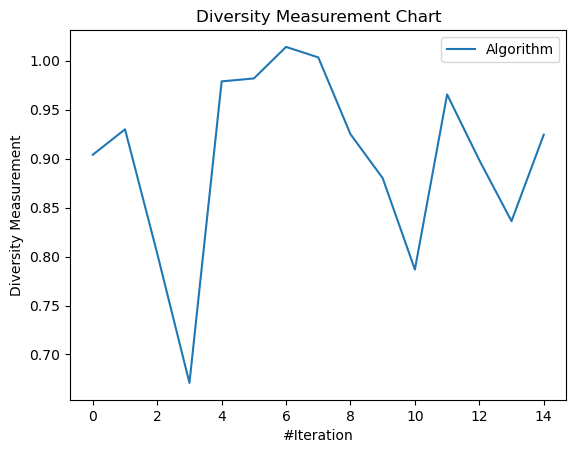

In [ ]:
BATCH_ENCODER = LabelEncoder()
BATCH_ENCODER.fit([32, 64, 128])

#act encoder --> Which activation function should be used?
ACT_ENCODER = LabelEncoder()
ACT_ENCODER.fit(['softmax', 'softplus', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'])

#Learning Rate encoder
LR_ENCODER = LabelEncoder()
LR_ENCODER.fit([0.0005, 0.001, 0.005, 0.01, 0.05, 0.1])

#Filter encoder
FILTER_ENCODER = LabelEncoder()
FILTER_ENCODER.fit([25, 50, 75])

#Hidden Units encoder
HIDDEN_ENCODER = LabelEncoder()
HIDDEN_ENCODER.fit([400, 512, 640])

def objective_function(params):
  '''RULES:
      Batch Size - 32, 64, 128
      Activation - softmax, softplus, relu, tanh, sigmoid, hard_sigmoid, linear
      Learning Rate - 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1
      Filters - 25, 50, 75
      Hidden Units - 400, 512, 640
      Dense Layers - 5, 8, 10
  '''
  batch_size = BATCH_ENCODER.inverse_transform([int(params[0])])[0]
  activation = ACT_ENCODER.inverse_transform([int(params[1])])[0]
  learning_rate = LR_ENCODER.inverse_transform([int(params[2])])[0]
  filter = FILTER_ENCODER.inverse_transform([int(params[3])])[0]
  hidden_units = HIDDEN_ENCODER.inverse_transform([int(params[4])])[0]

  model = tensorflow.keras.Sequential()
  model.add(tensorflow.keras.layers.Input(shape=(X_rebalance.shape[1], X_rebalance.shape[2]))),
  model.add(tensorflow.keras.layers.Conv1D(filters=filter, kernel_size=3, activation='sigmoid')),
  model.add(tensorflow.keras.layers.MaxPooling1D(pool_size=2)),
  model.add(tensorflow.keras.layers.Dropout(0.3)),
  model.add(tensorflow.keras.layers.BatchNormalization()),
  model.add(tensorflow.keras.layers.LSTM(64)),
  model.add(tensorflow.keras.layers.Flatten()),
  model.add(tensorflow.keras.layers.Dense(int(hidden_units), activation=activation)),
  model.add(tensorflow.keras.layers.Dropout(0.5)),
  model.add(tensorflow.keras.layers.Dense(1, activation='sigmoid'))


  optimizer = tensorflow.keras.optimizers.SGD(learning_rate=learning_rate)
  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

  history = model.fit(X_rebalance, y_rebalance, batch_size=batch_size, epochs=15, validation_data=(X_validation_encode, y_validation_encode), verbose=0)
  min_validation_accuracy = 1-history.history['val_accuracy'][-1]
  print(f"Accuracy {min_validation_accuracy}")
  return min_validation_accuracy

LB = [0, 0, 0, 0, 0]
UB = [2.99, 6.99, 5.99, 2.99, 2.99]

problem_dict = {
    "obj_func": objective_function,
    "bounds": FloatVar(lb=LB, ub=UB),
    "minmax": "min",
    "verbose": True
}

model = FOX.OriginalFOX(epoch=15, pop_size=20)
g_best = model.solve(problem_dict)
print(f"Solution: {g_best.solution}, Fitness: {g_best.target.fitness}")
print(f"Solution: {model.g_best.solution}, Fitness: {model.g_best.target.fitness}")
model.history.save_global_objectives_chart(filename="fox-gd/goc")
model.history.save_local_objectives_chart(filename="fox-gd/loc")

model.history.save_global_best_fitness_chart(filename="fox-gd/gbfc")
model.history.save_local_best_fitness_chart(filename="fox-gd/lbfc")

model.history.save_runtime_chart(filename="fox-gd/rtc")

model.history.save_exploration_exploitation_chart(filename="fox-gd/eec")

model.history.save_diversity_chart(filename="fox-gd/dc")


Solution: [1.93953005 0.24121147 5.41064474 2.19970513 1.24955227], Fitness: 0.0

Batch Size - 32, **64**, 128

Activation - **softmax**, softplus, relu, tanh, sigmoid, hard_sigmoid, linear

Learning Rate - 0.0005, 0.001, 0.005, 0.01, 0.05, **0.1**

Filters - 25, 50, **75**

Hidden Units - 400, **512**, 640

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 2, 75)          │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 1, 75)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 75)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1, 75)          │           300 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        35,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,233 (274.35 KB)

 Trainable params: 70,083 (273.76 KB)

 Non-trainable params: 150 (600.00 B)

Epoch 1/70
617/617 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5026 - loss: 0.6932 - val_accuracy: 0.6151 - val_loss: 0.6850
Epoch 2/70
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4985 - loss: 0.6934 - val_accuracy: 0.3849 - val_loss: 0.6944
Epoch 3/70
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5017 - loss: 0.6933 - val_accuracy: 0.6151 - val_loss: 0.6900
Epoch 4/70
617/617 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5027 - loss: 0.6932 - val_accuracy: 0.6151 - val_loss: 0.6916
Epoch 5/70
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4942 - loss: 0.6933 - val_accuracy: 0.3849 - val_loss: 0.6938
Epoch 6/70
617/617 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4974 - loss: 0.6933 - val_accuracy: 0.3849 - val_loss: 0.6936
Epoch 7/70
617/617 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4962 - loss: 0.6933 - val_accuracy: 0.3849 - val_loss: 0.6946
Epoch 8/70
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5012 - loss: 0.6932 - val_accuracy: 

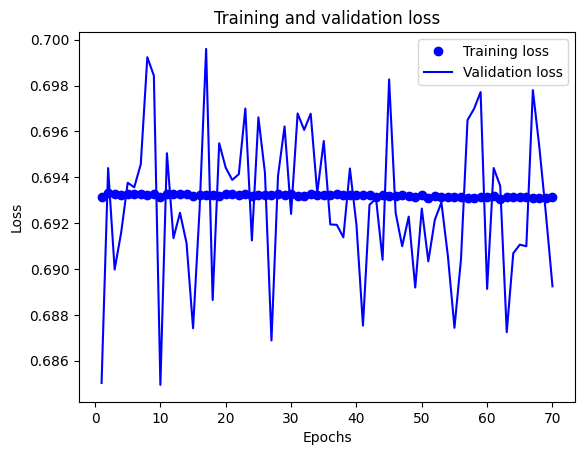

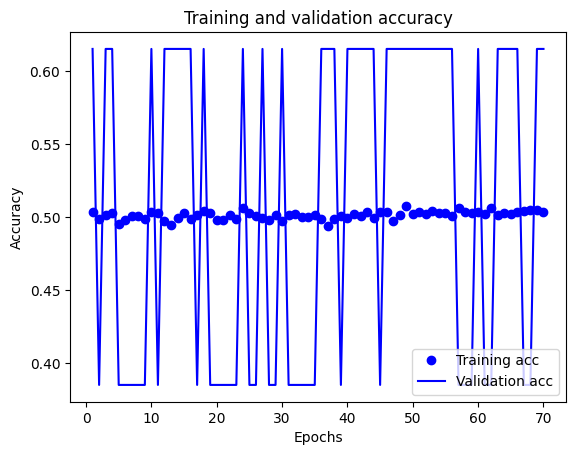


Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1527
           1       0.61      1.00      0.76      2432

    accuracy                           0.61      3959
   macro avg       0.31      0.50      0.38      3959
weighted avg       0.38      0.61      0.47      3959


Confusion Matrix
[[   0 1527]
 [   0 2432]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


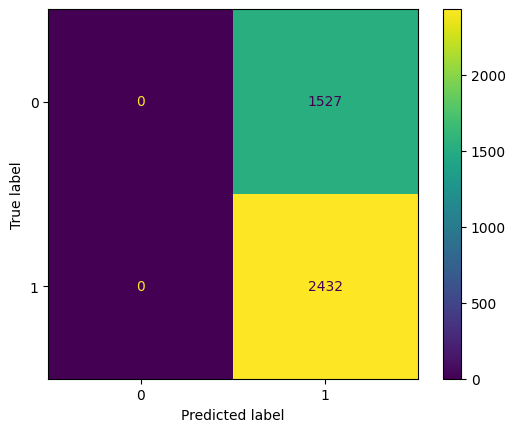

Time taken: 394.1409 seconds


In [ ]:
start_time_2 = time.perf_counter()
with tensorflow.device('/device:GPU:0'):
  # CNN model detection
  # https://keras.io/api/layers/activations/#softmax-function
  detection_model = tensorflow.keras.Sequential([
      tensorflow.keras.layers.Input(shape=(X_rebalance.shape[1],X_rebalance.shape[2])),
      tensorflow.keras.layers.Conv1D(filters=75, kernel_size=3, activation='sigmoid'),
      tensorflow.keras.layers.MaxPooling1D(pool_size=2),
      tensorflow.keras.layers.Dropout(0.3),
      tensorflow.keras.layers.BatchNormalization(),
      tensorflow.keras.layers.LSTM(64),
      tensorflow.keras.layers.Flatten(),
      # 1 layer
      tensorflow.keras.layers.Dense(512, activation='softmax'),
      tensorflow.keras.layers.Dropout(0.5),
      # either attack or normal
      tensorflow.keras.layers.Dense(1, activation='sigmoid')
  ])

  detection_model.summary()
  # https://keras.io/api/losses/probabilistic_losses/#probabilistic-losses
  sgd = tensorflow.keras.optimizers.SGD(learning_rate=0.1)
  detection_model.compile(optimizer=sgd,
                loss=tensorflow.keras.losses.BinaryCrossentropy(from_logits=False),
                metrics=['accuracy'])

  history = detection_model.fit(X_rebalance, y_rebalance, batch_size=64, epochs=70, validation_data=(X_validation_encode, y_validation_encode))
  test_loss, test_acc = detection_model.evaluate(X_test_encode, y_test_encode)

  # Make predictions
  prediction = detection_model.predict(X_test_encode)
  print(prediction)
  attack_prediction = numpy.where(prediction > 0.5, 1, 0)
  print(attack_prediction)
  print(y_test)

  # Evaluate the model
  print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}\n")
  # https://www.tensorflow.org/tutorials/keras/text_classification for training and validation loss and accuracy
  history_dict = history.history
  # print(history_dict.keys())
  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = range(1, len(acc) + 1)

  # "bo" is for "blue dot"
  plt.plot(epochs, loss, 'bo', label='Training loss')
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  print("\n")

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.show()

  print("\nClassification Report")
  print(classification_report(y_test, attack_prediction))

  print("\nConfusion Matrix")
  print(confusion_matrix(y_test, attack_prediction))
  ConfusionMatrixDisplay.from_predictions(y_test, attack_prediction)
  plt.show()

end_time2 = time.perf_counter()
print(f"Time taken: {end_time2 - start_time_2:0.4f} seconds")